- The MNIST dataset is one of the most famous datasets in machine learning and computer vision.

- Images: 70,000 grayscale images of handwritten digits (0 through 9)
  - 60,000 for training
  - 10,000 for testing

- Image size: 28 x 28 pixels (784 total pixels)

- Pixel values: 0 (black) to 255 (white).

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Show the shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


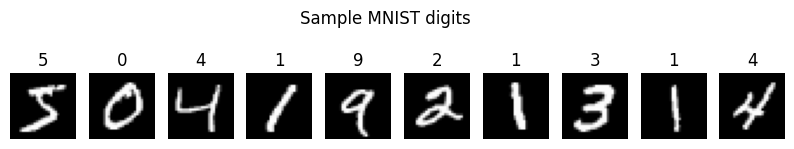

In [4]:
# Plot the first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Sample MNIST digits")
plt.show()

In [5]:
#Normalization of input
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) # Shape becomes (60000, 784)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]) # Shape becomes (10000, 784)

In [7]:
# Add Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


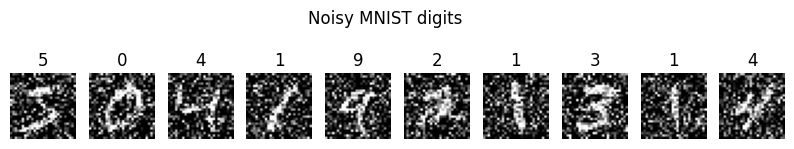

In [8]:
# Plot the noisy images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Noisy MNIST digits")
plt.show()

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)  

# Decoder
decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
output_img = Dense(784, activation='sigmoid')(decoded2)

# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer='adam', loss='mse')

# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = autoencoder.fit(
    x_train_noisy,             # Noisy images as Input
    x_train,             # Clean Images as Target
    epochs=30,           # No if iterations
    batch_size=256,      # Reasonable batch size for MNIST
    shuffle=True,        # Shuffle data to avoid local patterns
    validation_data=(x_test_noisy, x_test)  # Evaluate on noisy test inputs vs clean outputs
)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0950 - val_loss: 0.0460
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0429 - val_loss: 0.0368
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0356 - val_loss: 0.0326
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0322 - val_loss: 0.0301
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0299 - val_loss: 0.0282
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0280 - val_loss: 0.0268
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0266 - val_loss: 0.0257
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0255 - val_loss: 0.0249
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0248 - val_loss: 0.0240
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0240 - val_loss: 0.0237
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0235 - val_loss: 0.0230
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

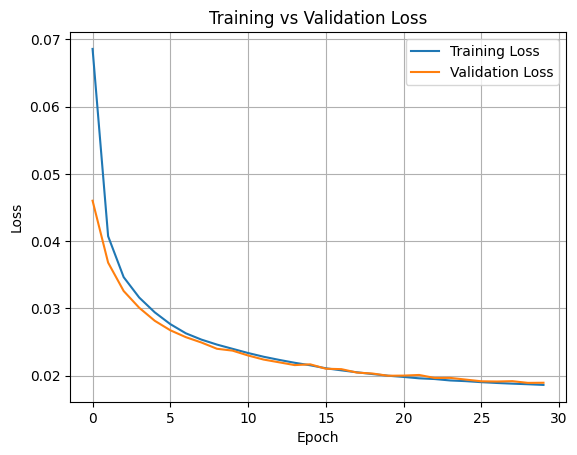

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


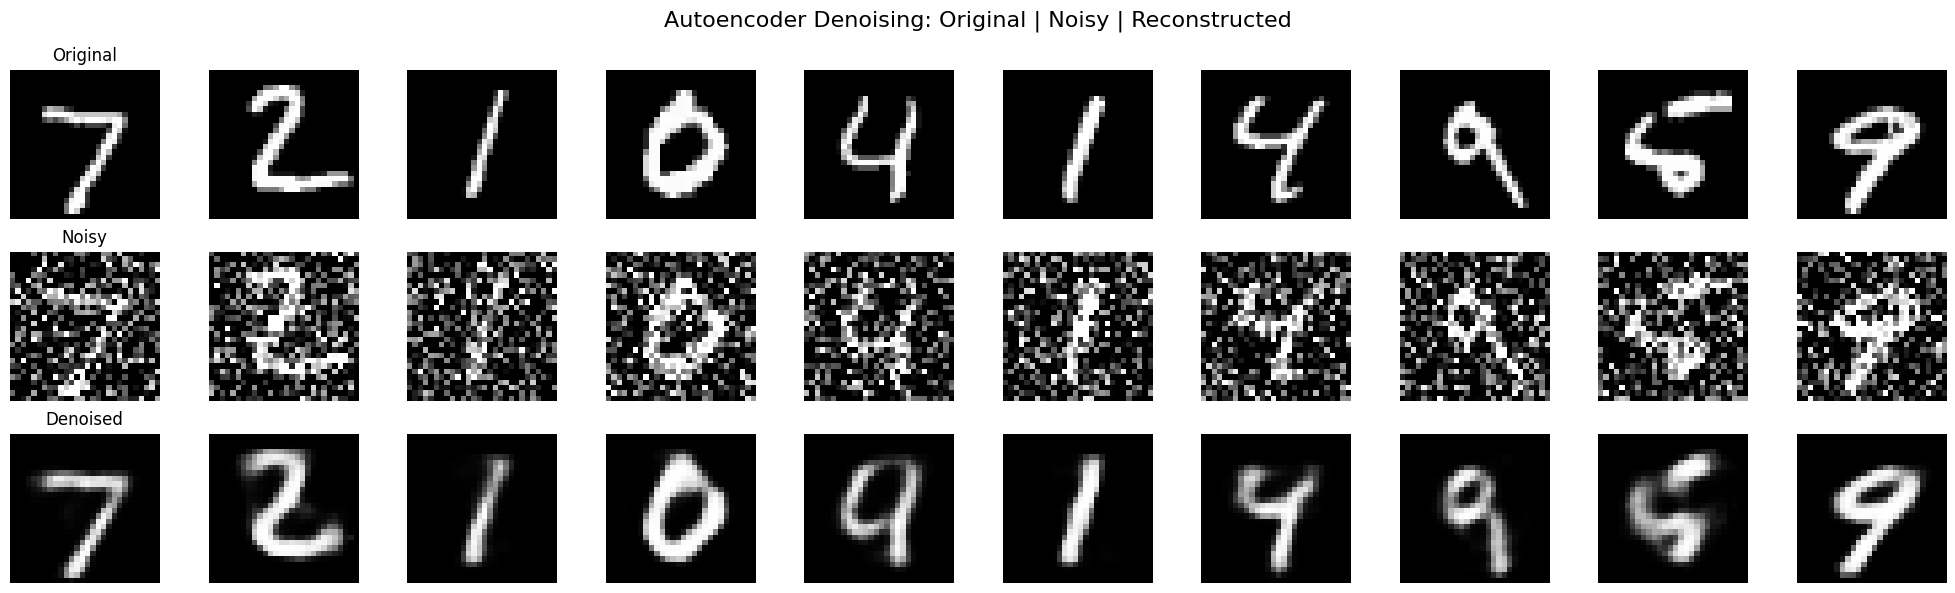

In [13]:
# Reconstruct test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Show 10 original + noisy + denoised images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("Original")

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("Noisy")

    # Denoised (Reconstructed)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("Denoised")

plt.suptitle("Autoencoder Denoising: Original | Noisy | Reconstructed", fontsize=16)
plt.tight_layout()
plt.show()